# Dataset Description 
You have been provided with a dataset of Zee Supermarkets with stores in different cities of India. The 
dataset contains information about its Customers and their amount of purchases in terms of Spending Score. 


## The Supermarket owner wants to analyse this data and improve its future sales based on the analysis 

# Task We are going to perform here are as follows:
1. Load the Data. Check if any of the columns contain any Null values and remove them. Print the number
of columns and their column names
2. Calculate Measures of Central Tendency - Mean, Median, and Mode for the Annuallncome column and
print their values
3. Obtain different summary statistics (Variance, Standard Deviation, and Skewness) for the Spending
Score column and print their values
4. Detect Outliers based on data in Annuallncome and SpendingScore columns using Z-Score
5.Detect Outliers based on data in CustomerAge and SpendingScore column using Scatter Plot

# Load the Data. Check if any of the columns contain any Null values and remove them. Print the number of columns and their column names

In [1]:
#importing pandas libraries for data analysis
import pandas as pd

data = pd.read_csv('../input/shopping-data/Shopping_CustomerData.csv')

In [2]:
data.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [3]:
data.tail()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
195,1196,Female,54,Delhi,317466.4207,601,52,4
196,1197,Female,20,Bengaluru,323305.5002,554,58,1
197,1198,Male,44,Chennai,109058.5443,844,36,2
198,1199,Male,28,Delhi,160116.8930,837,24,4
199,1200,Male,41,Chennai,280081.3901,789,31,2


In [4]:
#checking the null values in all columns

print(data.isnull().sum())

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64


# Calculate Measures of Central Tendency - Mean, Median, and Mode for the Annuallncome column and print their values

In [5]:
#FINDING MEAN
mean= data['AnnualIncome'].mean()
print(mean)

285143.9316464401


We can see from above the average annual income of the customers at supermarket

In [6]:
#FINDING MEDIAN
median = data['AnnualIncome'].median()
print(median)

263418.50555


In [7]:
#FINDING MODE
mode= data['AnnualIncome'].mode() 
print(mode)

0        2577.057456
1        5121.652342
2       10349.414070
3       12396.061280
4       15305.842870
           ...      
195    651534.309800
196    671028.187200
197    675461.735700
198    687212.770700
199    695407.091700
Length: 200, dtype: float64


#Another way of finding mode is by importing from statistics

import numpy as np

from statistics import mode

mode(data)

# Obtain different summary statistics (Variance, Standard Deviation, and Skewness) for the Spending Score and print their values

In [8]:
#FINDING THE VARIANCE OF SPENDING SCORE TO SEE HOW FAR I8S THE EXPENSE FROM DATA
var = data['SpendingScore'].var()
print(var)

824.9929396984925


In [9]:
#FINDING STANDARD DEVIATION
std= data['SpendingScore'].std() 
print(std)

28.722690328353515


In [10]:
#finding standard deviation
from scipy.stats import skew 
skew(data['SpendingScore']) 
#The term “skewness” refers to the statistical metric that is used to measure the asymmetry of a probability distribution of random variables about its own mean, and its value can be positive, negative, or undefined.

0.10081837365183154

# Detect Outliers based on data in Annuallncome and SpendingScore column using Z-Score

In [11]:
#An outlier is a piece of data that is an abnormal distance from other points. In other words, it's data that lies outside the other values in the set.
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[['AnnualIncome','SpendingScore']]))
print(z)
print('z-score based on data in AnnualIncome and SpendingScore columns\n')

     AnnualIncome  SpendingScore
0        1.435993       0.952679
1        0.462074       0.429133
2        0.715143       0.638551
3        1.356137       0.722668
4        0.171497       1.560341
..            ...            ...
195      0.191478       0.045199
196      0.226068       0.254618
197      1.043125       0.513249
198      0.740657       0.932086
199      0.029990       0.687765

[200 rows x 2 columns]
z-score based on data in AnnualIncome and SpendingScore columns



### zscore(arr, axis=0, ddof=0) function computes the relative Z-score of the input data, relative to the sample mean and standard deviation

In [12]:
threshold= 2 #Defining a Threshold to identify an Outlier 
print(np.where(z > 2))

(array([ 62,  65, 114, 148, 155, 166, 171, 177, 194]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))


### From above, you can see that the first array contains the list of row numbers and the second array contains corresponding column numbers, which means z[62][0] have a Z-Score higher than 2 So, the datapoint - 62nd record on column Annuallncome is an Outlier

# Detect Outliers based on data in CustomerAge and SpendingScore column using Scatter Plot

<AxesSubplot:xlabel='CustomerAge', ylabel='SpendingScore'>

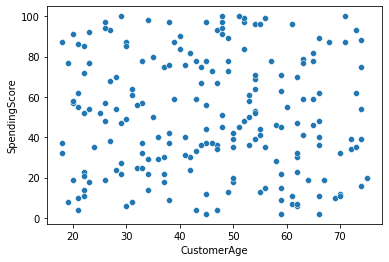

In [13]:
%matplotlib inline 
import seaborn as sns
sns.scatterplot(x="CustomerAge", y="SpendingScore", data=data) 

### From above, you can see that Outliers do not seem to be present in this dataset